In [145]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
import requests
from io import StringIO
import datetime
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
import gmaps
import gmaps.datasets
warnings.filterwarnings('ignore')

#ML
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, make_scorer
from scipy import stats
from scipy.stats import norm, skew 


In [3]:
aprender = pd.read_csv('Aprender2018-primaria-6.csv', delimiter=";")

In [4]:
aprender

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
0,4,2,1,1,1,10,2,2,1,2,...,"3,1642308","3,4787247",4,"624,30237","3,6379006",3,"497,9606",-1,-1,-1
1,2,1,1,1,1,4,1,1,-9,1,...,"3,1642308","3,4787247",3,"541,39209","3,6379006",3,"511,72632",1,1,1
2,2,1,1,1,1,6,1,1,-9,1,...,"3,1642308","3,4787247",3,"470,68723","3,6379006",3,"497,24191",2,2,2
3,5,2,1,1,1,6,1,1,2,1,...,"2,203661","2,208158",2,"434,76788","2,2108715",1,"364,33578",3,3,3
4,4,2,1,1,1,5,1,1,-9,1,...,"2,203661","2,208158",2,"418,23492","2,2108715",1,"366,13287",2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579505,3,2,1,1,1,5,1,1,2,1,...,"1,2030054","1,204447",3,"536,84021","1,2678566",2,"426,88309",-1,-1,-1
579506,3,2,1,1,1,8,1,2,1,1,...,"1,2030054","1,204447",3,"515,03595","1,2678566",2,"422,74527",3,3,3
579507,3,2,1,1,1,6,1,2,2,1,...,"1,2030054","1,204447",4,"565,8797","1,2678566",2,"423,95142",2,2,2
579508,3,2,1,1,1,6,1,2,2,1,...,"1,2030054","1,204447",4,"550,91693","1,2678566",3,"469,24432",3,3,3


In [5]:
#Primero seleccionamos las columnas que nos interesan analizar y les ponemos un nombre más descriptivo
ds = aprender[['ap3a','cod_provincia', 'ap1', 'ap2', 'mpuntaje', 
             'lpuntaje', 'ambito', 'sector', 'ap39', 'ap40',
            'ap33','ap27a', 'ap27b', 'ap17', 'ap9', 'ap10', 'ap8']]
ds.columns = ['nacionalidad','provincia', 'edad', 'sexo', 'nota_mate', 
              'nota_lengua', 'ambito', 'sector','asist_sec', 'viaje_sec',
             'tiempo_viaje', 'tiene_celu', 'celu_int', 'repitio', 'edu_mama', 'edu_papa', 'cant_libros']

#Creamos los diccionarios para cada una de las variables

sexo = {
    -9 : 'Blanco',
    -6 : 'Multimarca',
    1 : 'Varón',
    2 : 'Mujer',
}

provincias = {
2 : 'Ciudad Autónoma de Buenos Aires',
6 : 'Buenos aires',
10 : 'Catamarca',
14 : 'Córdoba',
18 : 'Corrientes',
22 : 'Chaco',
26 : 'Chubut',
30 : 'Entre Ríos',
34 : 'Formosa',
38 : 'Jujuy',
42 : 'La Pampa',
46 : 'La Rioja',
50 : 'Mendoza',
54 : 'Misiones',
58 : 'Neuquén',
62 : 'Río Negro',
66 : 'Salta',
70 : 'San Juan',
74 : 'San Luis',
78 : 'Santa Cruz',
82 : 'Santa Fe',
86 : 'Santiago del Estero',
90 : 'Tucumán',
94 : 'Tierra del Fuego'

}

ambito = {
    1 : 'Urbano',
    2 : 'Rural'
}

sector = {
    1 : 'Estatal',
    2 : 'Privado'

}

asist_sec = {
    -9 : 'Blanco',
    -6 : 'Multimarca',
    1 : 'Si',
    2 : 'No',
    3 : 'No sé'
}

viaje_sec = {
    
    -9 : 'Blanco',
    -6 : 'Multimarca',
    1 : 'No, voy a ir a una escuela que queda cerca',
    2 : 'Sí, voy tener que viajar muchas horas por día',
    3 : 'Sí, voy a tener que irme a vivir a otro lado',
    4 : 'No lo sé'

}

tiempo_viaje = {
    
    -9 : 'Blanco',
    -6 : 'Multimarca',
    1 : 'Menos de media hora',
    2 : 'Entre media hora y una hora',
    3 : 'Entre una hora y dos horas',
    4 : 'Más de dos horas',

}

tiene_celu = {
-9 : 'Blanco',
-6 : 'Multimarca',
1 : 'Sí', 
2 : 'No',
    
    }

celu_int= {
    -9 : 'Blanco',
-6 : 'Multimarca',
1 : 'Sí',
2 : 'No',
-1 : 'No',

}

repitio = {
    -9 : 'Blanco',
-6 : 'Multimarca',
1 : 'No',
2 : 'Sí, una vez',
3 : 'Sí, dos veces',
4 : 'Sí, tres veces o más',

}

edu_mama = {
    -9 : 'Blanco',
1 : 'No fue a la escuela',
2 : 'Primaria incompleta',
3 : 'Primaria completa',
4 : 'Secundaria incompleta',
5 : 'Secundaria completa',
6 : 'Universitario o terciario incompleto',
7 : 'Universitario o terciario completo',
8 : 'No sé',

}

edu_papa = {
    -9 : 'Blanco',
1 : 'No fue a la escuela',
2 : 'Primaria incompleta',
3 : 'Primaria completa',
4 : 'Secundaria incompleta',
5 : 'Secundaria completa',
6 : 'Universitario o terciario incompleto',
7 : 'Universitario o terciario completo',
8 : 'No sé',

}


cant_libros = {
    1 : 'No hay libros',
2 : 'De 1 a 25 libros',
3 : 'De 26 a 50 libros',
4 : 'De 51 a 100 libros',
5 : 'Más de 100 libros',
6 : 'No sé',

}

#Reemplazamos los nuevos valores
ds['provincia'].replace(provincias, inplace=True)
ds['sexo'].replace(sexo, inplace=True)
ds['ambito'].replace(ambito, inplace=True)
ds['sector'].replace(sector, inplace=True)
ds['asist_sec'].replace(asist_sec, inplace=True)
ds['viaje_sec'].replace(viaje_sec, inplace=True)
ds['tiempo_viaje'].replace(tiempo_viaje, inplace=True)
ds['tiene_celu'].replace(tiene_celu, inplace=True)
ds['celu_int'].replace(celu_int, inplace=True)
ds['repitio'].replace(repitio, inplace=True)
ds['edu_mama'].replace(edu_mama, inplace=True)
ds['edu_papa'].replace(edu_papa, inplace=True)
ds['cant_libros'].replace(cant_libros, inplace=True)


#graf_h = sns.countplot(data=dsh, x='provincia')
#graf_h.set_xticklabels(graf_h.get_xticklabels(), rotation=90)

In [6]:
ds['nota_mate'] = ds['nota_mate'].str.replace(',','.')
ds['nota_lengua'] = ds['nota_lengua'].str.replace(',','.')
ds['nota_mate'] = ds['nota_mate'].str.replace(' ','')
ds['nota_lengua'] = ds['nota_lengua'].str.replace(' ','')

In [7]:
ds['nota_mate'] = pd.to_numeric(ds['nota_mate'])
ds['nota_lengua'] = pd.to_numeric(ds['nota_lengua'])

In [8]:
#Vemos si hay correlación entre las notas
ds[['nota_mate','nota_lengua']].corr()

,nota_mate,nota_lengua
nota_mate,1.00000,0.63181
nota_lengua,0.63181,1.00000


Hay un 63% de correlación entre la calificación de Matemática y la de Lengua

In [9]:
ds['nota_mate'].describe()

count    552031.000000
mean        501.083503
std         101.453136
min         214.721270
25%         424.141845
50%         490.662720
75%         571.477175
max         800.485410
Name: nota_mate, dtype: float64

[Text(0, 0, 'Buenos aires'),
 Text(1, 0, 'Córdoba'),
 Text(2, 0, 'Santa Fe'),
 Text(3, 0, 'Mendoza'),
 Text(4, 0, 'Ciudad Autónoma de Buenos Aires'),
 Text(5, 0, 'Tucumán'),
 Text(6, 0, 'Salta'),
 Text(7, 0, 'Entre Ríos'),
 Text(8, 0, 'Corrientes'),
 Text(9, 0, 'Chaco'),
 Text(10, 0, 'Misiones'),
 Text(11, 0, 'Santiago del Estero'),
 Text(12, 0, 'San Juan'),
 Text(13, 0, 'Jujuy'),
 Text(14, 0, 'Formosa'),
 Text(15, 0, 'Río Negro'),
 Text(16, 0, 'Chubut'),
 Text(17, 0, 'San Luis'),
 Text(18, 0, 'Catamarca'),
 Text(19, 0, 'La Rioja'),
 Text(20, 0, 'La Pampa'),
 Text(21, 0, 'Santa Cruz'),
 Text(22, 0, 'Neuquén'),
 Text(23, 0, 'Tierra del Fuego')]

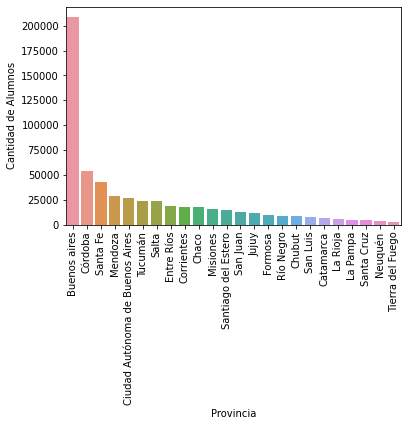

In [10]:
#Primero veamos cuantos alumnos por provincia incluye el dataset
q_porprov = ds[["provincia"]].groupby(["provincia"]).size().reset_index()
q_porprov.columns = ['Provincia', 'Cantidad de Alumnos']
q_porprov = q_porprov.sort_values('Cantidad de Alumnos', ascending=False)
graf_qprov = sns.barplot(data=q_porprov,x='Provincia', y="Cantidad de Alumnos")
graf_qprov.set_xticklabels(graf_qprov.get_xticklabels(), rotation=90)

En el gráfico podemos ver que Buenos Aires es la provincia con más alumnos presentes en el dataset

[Text(0, 0, 'Buenos aires'),
 Text(1, 0, 'Ciudad Autónoma de Buenos Aires'),
 Text(2, 0, 'Catamarca'),
 Text(3, 0, 'Córdoba'),
 Text(4, 0, 'Corrientes'),
 Text(5, 0, 'Chaco'),
 Text(6, 0, 'Chubut'),
 Text(7, 0, 'Entre Ríos'),
 Text(8, 0, 'Formosa'),
 Text(9, 0, 'Jujuy'),
 Text(10, 0, 'La Pampa'),
 Text(11, 0, 'La Rioja'),
 Text(12, 0, 'Mendoza'),
 Text(13, 0, 'Misiones'),
 Text(14, 0, 'Neuquén'),
 Text(15, 0, 'Río Negro'),
 Text(16, 0, 'Salta'),
 Text(17, 0, 'San Juan'),
 Text(18, 0, 'San Luis'),
 Text(19, 0, 'Santa Cruz'),
 Text(20, 0, 'Santa Fe'),
 Text(21, 0, 'Santiago del Estero'),
 Text(22, 0, 'Tucumán'),
 Text(23, 0, 'Tierra del Fuego')]

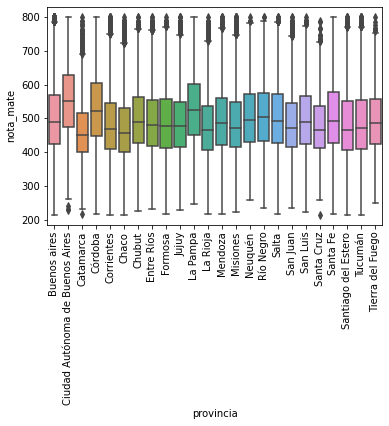

In [11]:
graf_mate = sns.boxplot(data=ds, y='nota_mate', x='provincia')
graf_mate.set_xticklabels(graf_mate.get_xticklabels(), rotation=90)

En el gráfico podemos ver que la Ciudad Autónoma de Buenos Aires, Córdoba, La Pampa y Santa Fe tienen una media mayor al resto en cuanto al desempeño en matemática.

In [12]:
ds['viaje_sec'].unique()

array([-1, 'No, voy a ir a una escuela que queda cerca', 'No lo sé',
       'Sí, voy a tener que irme a vivir a otro lado',
       'Sí, voy tener que viajar muchas horas por día', 'Blanco',
       'Multimarca'], dtype=object)

[Text(0, 0, '-1'),
 Text(1, 0, 'No, voy a ir a una escuela que queda cerca'),
 Text(2, 0, 'No lo sé'),
 Text(3, 0, 'Sí, voy a tener que irme a vivir a otro lado'),
 Text(4, 0, 'Sí, voy tener que viajar muchas horas por día'),
 Text(5, 0, 'Blanco'),
 Text(6, 0, 'Multimarca')]

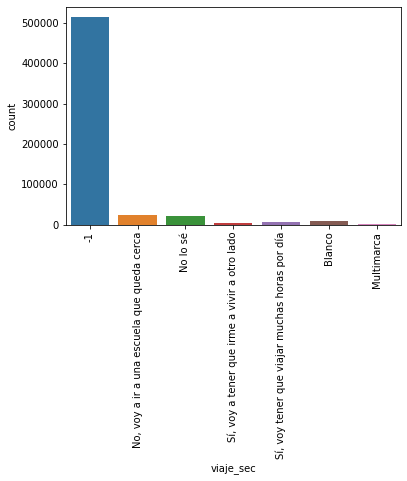

In [13]:
graf_viajesec = sns.countplot(ds['viaje_sec'])
graf_viajesec.set_xticklabels(graf_viajesec.get_xticklabels(), rotation=90)

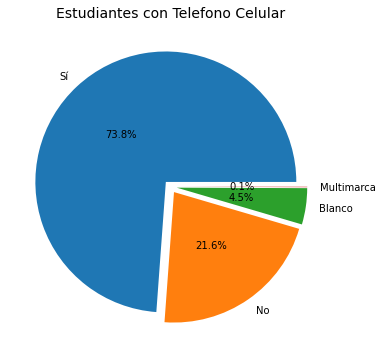

In [14]:
porc_celu = ds[['tiene_celu']].groupby(['tiene_celu']).size().reset_index()
porc_celu.columns = ["r", "q"]
porc_celu["porc"] = porc_celu["q"]/porc_celu["q"].sum()
porc_celu = porc_celu.sort_values('porc', ascending=False)

#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(porc_celu['q'], autopct="%.1f%%", explode=[0.05]*4, labels=porc_celu['r'], pctdistance=0.5)
plt.title("Estudiantes con Telefono Celular", fontsize=14);

Podemos ver que el 73,8% de los estudiantes tiene telefonos celulares. Analicemos si esta variable influye sobre el desempeño de estos alumnos en matemática

In [15]:
t_celu = ds[['tiene_celu','nota_mate']]

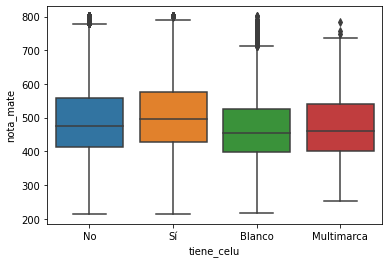

In [16]:
ax = sns.boxplot(data=t_celu,x="tiene_celu", y="nota_mate")  
plt.show()

Esta variable no pareciera influir demasiado en el desempeño de los alumnos en matemática

In [17]:
#Ahora analizamos el núcleo familiar y vemos si la educación de los padres del alumno influye en su desempeño en matemática
ed_padres3 = ds[['provincia','nota_mate', 'edu_mama', 'edu_papa']]
rep = {
    'No fue a la escuela' : 0,
    'Primaria incompleta' : 0,
    'Primaria completa' : 1,
    'Secundaria incompleta' : 1,
    'Secundaria completa' : 1,
    'Universitario o terciario incompleto' : 1,
    'Universitario o terciario completo' : 1
}
#Primero filtramos las filas en blanco y aquellos que ingresaron "no se"
ed_padres3 = ed_padres3[ed_padres3['edu_mama'].astype(str) != "Blanco"]
ed_padres3 = ed_padres3[ed_padres3['edu_mama'].astype(str) != "No sé"]
ed_padres3['edu_mama'].replace(rep, inplace=True)
ed_padres3 = ed_padres3[ed_padres3['edu_papa'].astype(str) != "Blanco"]
ed_padres3 = ed_padres3[ed_padres3['edu_papa'].astype(str) != "No sé"]
ed_padres3['edu_papa'].replace(rep, inplace=True)

ed_padres3['educacion'] = ed_padres3['edu_mama'] + ed_padres3['edu_papa']
ed_padres3.loc[ed_padres3['educacion'] == 0, 'educacion'] = 'Ninguno'
ed_padres3.loc[ed_padres3['educacion'] == 1, 'educacion'] = 'Alguno'
ed_padres3.loc[ed_padres3['educacion'] == 2, 'educacion'] = 'Ambos'

[Text(0, 0, 'Buenos aires'),
 Text(1, 0, 'Córdoba'),
 Text(2, 0, 'Santa Fe'),
 Text(3, 0, 'Mendoza'),
 Text(4, 0, 'Ciudad Autónoma de Buenos Aires'),
 Text(5, 0, 'Tucumán'),
 Text(6, 0, 'Salta'),
 Text(7, 0, 'Entre Ríos'),
 Text(8, 0, 'Corrientes'),
 Text(9, 0, 'San Juan'),
 Text(10, 0, 'Chaco'),
 Text(11, 0, 'Misiones'),
 Text(12, 0, 'Santiago del Estero'),
 Text(13, 0, 'Jujuy'),
 Text(14, 0, 'Río Negro'),
 Text(15, 0, 'Chubut'),
 Text(16, 0, 'Formosa'),
 Text(17, 0, 'San Luis'),
 Text(18, 0, 'Catamarca'),
 Text(19, 0, 'La Rioja'),
 Text(20, 0, 'La Pampa'),
 Text(21, 0, 'Santa Cruz'),
 Text(22, 0, 'Neuquén'),
 Text(23, 0, 'Tierra del Fuego')]

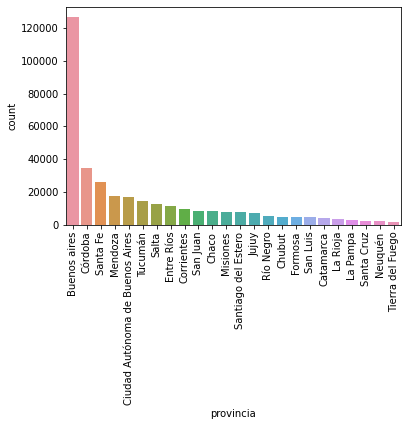

In [18]:
ed_padres3_graf = ed_padres3[ed_padres3['educacion']=='Ambos']
graf_anf = sns.countplot(data=ed_padres3_graf,x='provincia', order = ed_padres3_graf['provincia'].value_counts().index)
graf_anf.set_xticklabels(graf_anf.get_xticklabels(), rotation=90)

[Text(0, 0, 'Ciudad Autónoma de Buenos Aires'),
 Text(1, 0, 'Tierra del Fuego'),
 Text(2, 0, 'Buenos aires'),
 Text(3, 0, 'Córdoba'),
 Text(4, 0, 'Chubut'),
 Text(5, 0, 'San Luis'),
 Text(6, 0, 'La Pampa'),
 Text(7, 0, 'San Juan'),
 Text(8, 0, 'Santa Cruz'),
 Text(9, 0, 'Santa Fe'),
 Text(10, 0, 'Catamarca'),
 Text(11, 0, 'La Rioja'),
 Text(12, 0, 'Río Negro'),
 Text(13, 0, 'Neuquén'),
 Text(14, 0, 'Entre Ríos'),
 Text(15, 0, 'Jujuy'),
 Text(16, 0, 'Mendoza'),
 Text(17, 0, 'Tucumán'),
 Text(18, 0, 'Salta'),
 Text(19, 0, 'Corrientes'),
 Text(20, 0, 'Formosa'),
 Text(21, 0, 'Santiago del Estero'),
 Text(22, 0, 'Chaco'),
 Text(23, 0, 'Misiones')]

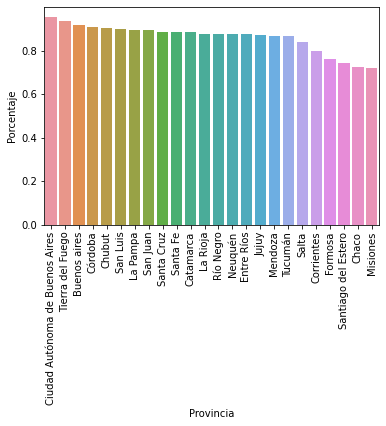

In [19]:
#Porcentaje de alumnos con ambos padres hasta primario completo
ed_padres4 = ds[['provincia','nota_mate', 'edu_mama', 'edu_papa']]
rep = {
    'No fue a la escuela' : 0,
    'Primaria incompleta' : 0,
    'Primaria completa' : 1,
    'Secundaria incompleta' : 1,
    'Secundaria completa' : 1,
    'Universitario o terciario incompleto' : 1,
    'Universitario o terciario completo' : 1
}
#Primero filtramos las filas en blanco y aquellos que ingresaron "no se"
ed_padres4 = ed_padres4[ed_padres4['edu_mama'].astype(str) != "Blanco"]
ed_padres4 = ed_padres4[ed_padres4['edu_mama'].astype(str) != "No sé"]
ed_padres4['edu_mama'].replace(rep, inplace=True)
ed_padres4 = ed_padres4[ed_padres4['edu_papa'].astype(str) != "Blanco"]
ed_padres4 = ed_padres4[ed_padres4['edu_papa'].astype(str) != "No sé"]
ed_padres4['edu_papa'].replace(rep, inplace=True)

ed_padres4['educacion'] = ed_padres4['edu_mama'] + ed_padres4['edu_papa']
ed_padres4.loc[ed_padres4['educacion'] == 0, 'educacion'] = 'Ninguno'
ed_padres4.loc[ed_padres4['educacion'] == 1, 'educacion'] = 'Alguno'
ed_padres4.loc[ed_padres4['educacion'] == 2, 'educacion'] = 'Ambos'

ed_ambos = ed_padres4[ed_padres4['educacion']=='Ambos']
ed_ambos = ed_ambos[['provincia', 'educacion']]
ed_todos = ed_padres4[['provincia', 'educacion']]
ed_ambos = ed_ambos[["provincia"]].groupby(["provincia"]).size()
ed_todos = ed_todos[["provincia"]].groupby(["provincia"]).size()
ed_ambos.columns = ['Provincia','Ambos']
#ed_padres4_graf['q'] = ed_padres4_graf[["provincia"]].groupby(["provincia"]).size()
#ed_padres4_graf['porc'] = ed_padres4_graf['q']/ed_padres4_graf['q'].sum()
#graf_anf = sns.barplot(data=ed_padres4_graf,x='provincia',y='porc', order = ed_padres4_graf['provincia'].value_counts().index)
#graf_anf.set_xticklabels(graf_anf.get_xticklabels(), rotation=90)
porc_an = pd.concat([ed_ambos,ed_todos],axis=1)
porc_an = porc_an.reset_index()
porc_an.columns = ['Provincia','Ambos','Total']
porc_an['Porcentaje'] = porc_an['Ambos']/porc_an['Total']
porc_an = porc_an.sort_values('Porcentaje', ascending=False)

porc_an_graf = sns.barplot(data=porc_an,x='Provincia',y='Porcentaje')
porc_an_graf.set_xticklabels(porc_an_graf.get_xticklabels(), rotation=90)

[Text(0, 0, 'Ciudad Autónoma de Buenos Aires'),
 Text(1, 0, 'Tierra del Fuego'),
 Text(2, 0, 'La Rioja'),
 Text(3, 0, 'Catamarca'),
 Text(4, 0, 'San Luis'),
 Text(5, 0, 'Buenos aires'),
 Text(6, 0, 'Santa Cruz'),
 Text(7, 0, 'Neuquén'),
 Text(8, 0, 'Jujuy'),
 Text(9, 0, 'Córdoba'),
 Text(10, 0, 'Santa Fe'),
 Text(11, 0, 'Salta'),
 Text(12, 0, 'Río Negro'),
 Text(13, 0, 'Chubut'),
 Text(14, 0, 'La Pampa'),
 Text(15, 0, 'Mendoza'),
 Text(16, 0, 'San Juan'),
 Text(17, 0, 'Tucumán'),
 Text(18, 0, 'Entre Ríos'),
 Text(19, 0, 'Corrientes'),
 Text(20, 0, 'Formosa'),
 Text(21, 0, 'Chaco'),
 Text(22, 0, 'Misiones'),
 Text(23, 0, 'Santiago del Estero')]

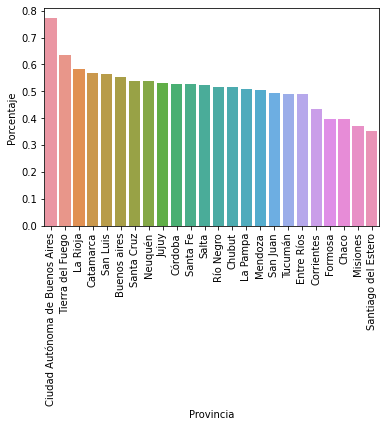

In [20]:
#Porcentaje de alumnos con ambos padres hasta secundario completo
ed_padres5 = ds[['provincia','nota_mate', 'edu_mama', 'edu_papa']]
rep = {
    'No fue a la escuela' : 0,
    'Primaria incompleta' : 0,
    'Primaria completa' : 0,
    'Secundaria incompleta' : 0,
    'Secundaria completa' : 1,
    'Universitario o terciario incompleto' : 1,
    'Universitario o terciario completo' : 1
}
#Primero filtramos las filas en blanco y aquellos que ingresaron "no se"
ed_padres5 = ed_padres5[ed_padres5['edu_mama'].astype(str) != "Blanco"]
ed_padres5 = ed_padres5[ed_padres5['edu_mama'].astype(str) != "No sé"]
ed_padres5['edu_mama'].replace(rep, inplace=True)
ed_padres5 = ed_padres5[ed_padres5['edu_papa'].astype(str) != "Blanco"]
ed_padres5 = ed_padres5[ed_padres5['edu_papa'].astype(str) != "No sé"]
ed_padres5['edu_papa'].replace(rep, inplace=True)

ed_padres5['educacion'] = ed_padres5['edu_mama'] + ed_padres5['edu_papa']
ed_padres5.loc[ed_padres5['educacion'] == 0, 'educacion'] = 'Ninguno'
ed_padres5.loc[ed_padres5['educacion'] == 1, 'educacion'] = 'Alguno'
ed_padres5.loc[ed_padres5['educacion'] == 2, 'educacion'] = 'Ambos'

ed_ambos = ed_padres5[ed_padres5['educacion']=='Ambos']
ed_ambos = ed_ambos[['provincia', 'educacion']]
ed_todos = ed_padres5[['provincia', 'educacion']]
ed_ambos = ed_ambos[["provincia"]].groupby(["provincia"]).size()
ed_todos = ed_todos[["provincia"]].groupby(["provincia"]).size()
ed_ambos.columns = ['Provincia','Ambos']
#ed_padres5_graf['q'] = ed_padres5_graf[["provincia"]].groupby(["provincia"]).size()
#ed_padres5_graf['porc'] = ed_padres5_graf['q']/ed_padres5_graf['q'].sum()
#graf_anf = sns.barplot(data=ed_padres5_graf,x='provincia',y='porc', order = ed_padres5_graf['provincia'].value_counts().index)
#graf_anf.set_xticklabels(graf_anf.get_xticklabels(), rotation=90)
porc_an = pd.concat([ed_ambos,ed_todos],axis=1)
porc_an = porc_an.reset_index()
porc_an.columns = ['Provincia','Ambos','Total']
porc_an['Porcentaje'] = porc_an['Ambos']/porc_an['Total']
porc_an = porc_an.sort_values('Porcentaje', ascending=False)

porc_an_graf = sns.barplot(data=porc_an,x='Provincia',y='Porcentaje')
porc_an_graf.set_xticklabels(porc_an_graf.get_xticklabels(), rotation=90)

In [21]:
#Ahora analizamos el núcleo familiar y vemos si la educación de los padres del alumno influye en su desempeño en matemática
ed_padres = ds[['nota_mate', 'edu_mama', 'edu_papa']]

Para analizar este punto convertimos la variable en binaria que será cero si no terminó al menos la primaria

In [22]:
rep = {
    'No fue a la escuela' : 0,
    'Primaria incompleta' : 0,
    'Primaria completa' : 1,
    'Secundaria incompleta' : 1,
    'Secundaria completa' : 1,
    'Universitario o terciario incompleto' : 1,
    'Universitario o terciario completo' : 1
}
#Primero filtramos las filas en blanco y aquellos que ingresaron "no se"
ed_padres = ed_padres[ed_padres['edu_mama'].astype(str) != "Blanco"]
ed_padres = ed_padres[ed_padres['edu_mama'].astype(str) != "No sé"]
ed_padres['edu_mama'].replace(rep, inplace=True)
ed_padres = ed_padres[ed_padres['edu_papa'].astype(str) != "Blanco"]
ed_padres = ed_padres[ed_padres['edu_papa'].astype(str) != "No sé"]
ed_padres['edu_papa'].replace(rep, inplace=True)

ed_padres['educacion'] = ed_padres['edu_mama'] + ed_padres['edu_papa']
ed_padres.loc[ed_padres['educacion'] == 0, 'educacion'] = 'Ninguno'
ed_padres.loc[ed_padres['educacion'] == 1, 'educacion'] = 'Alguno'
ed_padres.loc[ed_padres['educacion'] == 2, 'educacion'] = 'Ambos'

<AxesSubplot:xlabel='educacion', ylabel='count'>

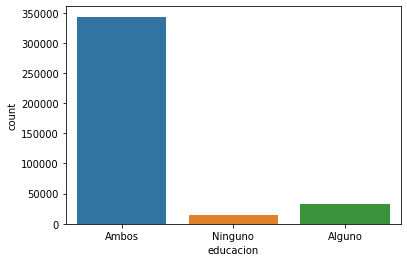

In [23]:
sns.countplot(x=ed_padres['educacion'])

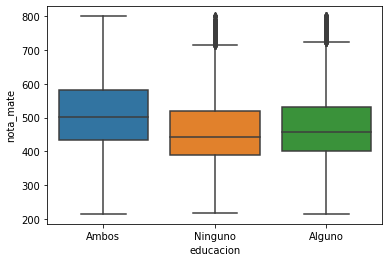

In [24]:
ed_padres['nota_mate'] = ds['nota_mate'].astype(str).str.replace(',','.')
ed_padres['nota_mate'] = ds['nota_mate'].astype(str).str.replace(' ','')
ed_padres['nota_mate'] = ds['nota_mate'].astype(float)
edu = sns.boxplot(data=ed_padres,x="educacion", y="nota_mate")  
plt.show()

Podemos ver que la media del desempeño para aquellos cuyos padres tienen al menos el Primario completo, es ligeramente superior al resto.

Realicemos el mismo análisis pero para aquellos que tienen padres con al menos el secundario completo

In [25]:
#Ahora analizamos el núcleo familiar y vemos si la educación de los padres del alumno influye en su desempeño en matemática
ed_padres2 = ds[['nota_mate', 'edu_mama', 'edu_papa']]

In [26]:
rep = {
    'No fue a la escuela' : 0,
    'Primaria incompleta' : 0,
    'Primaria completa' : 0,
    'Secundaria incompleta' : 0,
    'Secundaria completa' : 1,
    'Universitario o terciario incompleto' : 1,
    'Universitario o terciario completo' : 1
}
#Primero filtramos las filas en blanco y aquellos que ingresaron "no se"
ed_padres2 = ed_padres2[ed_padres2['edu_mama'].astype(str) != "Blanco"]
ed_padres2 = ed_padres2[ed_padres2['edu_mama'].astype(str) != "No sé"]
ed_padres2['edu_mama'].replace(rep, inplace=True)
ed_padres2 = ed_padres2[ed_padres2['edu_papa'].astype(str) != "Blanco"]
ed_padres2 = ed_padres2[ed_padres2['edu_papa'].astype(str) != "No sé"]
ed_padres2['edu_papa'].replace(rep, inplace=True)

ed_padres2['educacion'] = ed_padres2['edu_mama'] + ed_padres2['edu_papa']
ed_padres2.loc[ed_padres2['educacion'] == 0, 'educacion'] = 'Ninguno'
ed_padres2.loc[ed_padres2['educacion'] == 1, 'educacion'] = 'Alguno'
ed_padres2.loc[ed_padres2['educacion'] == 2, 'educacion'] = 'Ambos'

<AxesSubplot:xlabel='educacion', ylabel='count'>

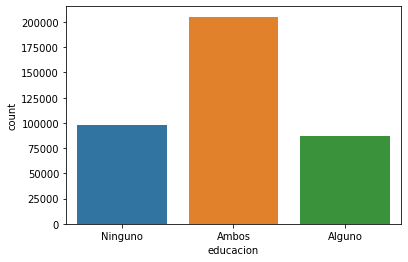

In [27]:
sns.countplot(x=ed_padres2['educacion'])

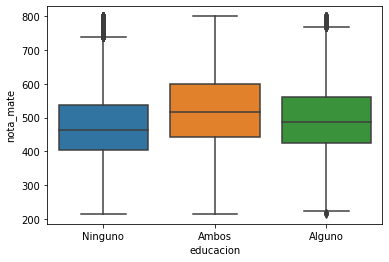

In [28]:
ed_padres2['nota_mate'] = ds['nota_mate'].astype(str).str.replace(',','.')
ed_padres2['nota_mate'] = ds['nota_mate'].astype(str).str.replace(' ','')
ed_padres2['nota_mate'] = ds['nota_mate'].astype(float)
edu = sns.boxplot(data=ed_padres2,x="educacion", y="nota_mate")  
plt.show()

Podemos ver que en este caso, la media del rendimiento en matemática para aquellos alumnos que tienen ambos padres con al menos el secundario completo tienen un desempeño ligeramente superior al resto. La media de aquellos que tienen al menos uno de sus padres con secundario completo, a su vez, es mayor a la de aquellos cuyos padres no han terminado el secundario.

# Modelo ML

In [90]:
df = pd.read_csv('Aprender2018-primaria-6.csv', delimiter=";", )

Text(0.5, 1.0, 'Nota matemática distribution')

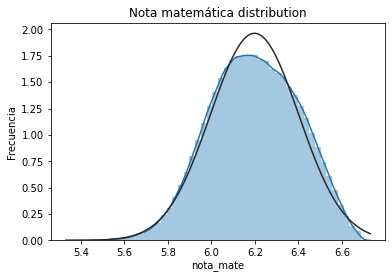

In [91]:
#Primero vamos a analizar la variable a predecir
dslog = np.log1p(ds['nota_mate'])
sns.distplot(dslog , fit=norm)

plt.ylabel('Frecuencia')
plt.title('Nota matemática distribution')

In [92]:
#Reemplazamos por NaNs los -9 y -6 que corresponden a valores blancos y multiples elecciones
df = df.replace([-9,-6,-1],np.nan)
df.shape

(579510, 124)

In [93]:
#Ver cuantos nans quedan en las columnas
faltantes = df.isna().sum().to_frame()
faltantes.columns = ['Faltantes']
faltantes = faltantes.sort_values('Faltantes', ascending=False)
faltantes.transpose()

,ap5h,ap42,ap38,ap36d,ap34b,ap36c,ap36b,ap34a,ap34c,ap36a,...,ICSE,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioal,isocioam
Faltantes,573195,565639,559777,534229,533453,533449,531908,531417,531070,526929,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Eliminamos las columnas que no tienen por lo menos 500000 valores no NaN
df=df.dropna(axis=1, thresh=500000)
df

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap6,ap7a,ap7b,...,ICSE,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioal,isocioam
0,4.0,2.0,1.0,1.0,1.0,10.0,2.0,3.0,2.0,1.0,...,1,"3,1642308","3,4787247",4,"624,30237","3,6379006",3,"497,9606",-1,-1
1,2.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,...,1,"3,1642308","3,4787247",3,"541,39209","3,6379006",3,"511,72632",1,1
2,2.0,1.0,1.0,1.0,1.0,6.0,1.0,7.0,1.0,2.0,...,1,"3,1642308","3,4787247",3,"470,68723","3,6379006",3,"497,24191",2,2
3,5.0,2.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,1.0,...,3,"2,203661","2,208158",2,"434,76788","2,2108715",1,"364,33578",3,3
4,4.0,2.0,1.0,1.0,1.0,5.0,1.0,5.0,NaN,NaN,...,3,"2,203661","2,208158",2,"418,23492","2,2108715",1,"366,13287",2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579505,3.0,2.0,1.0,1.0,1.0,5.0,1.0,6.0,1.0,1.0,...,1,"1,2030054","1,204447",3,"536,84021","1,2678566",2,"426,88309",-1,-1
579506,3.0,2.0,1.0,1.0,1.0,8.0,1.0,5.0,1.0,1.0,...,1,"1,2030054","1,204447",3,"515,03595","1,2678566",2,"422,74527",3,3
579507,3.0,2.0,1.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,...,1,"1,2030054","1,204447",4,"565,8797","1,2678566",2,"423,95142",2,2
579508,3.0,2.0,1.0,1.0,1.0,6.0,1.0,6.0,1.0,1.0,...,1,"1,2030054","1,204447",4,"550,91693","1,2678566",3,"469,24432",3,3


In [122]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = (df.replace('\.','', regex=True)
                        .replace(',','.', regex=True)
                        .astype(float))
df = df.dropna()
df

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap6,ap7a,ap7b,...,ICSE,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioal,isocioam
0,4.0,2.0,1.0,1.0,1.0,10.0,2.0,3.0,2.0,1.0,...,1.0,3.164231,3.478725,4.0,624.30237,3.637901,3.0,497.96060,-1.0,-1.0
1,2.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,...,1.0,3.164231,3.478725,3.0,541.39209,3.637901,3.0,511.72632,1.0,1.0
5,3.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,...,3.0,2.203661,2.208158,3.0,464.68726,2.210872,3.0,572.68365,2.0,2.0
6,3.0,1.0,1.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,...,3.0,2.203661,2.208158,4.0,689.28796,2.210872,3.0,563.13281,2.0,2.0
10,3.0,2.0,5.0,5.0,5.0,5.0,1.0,2.0,2.0,1.0,...,3.0,2.644393,3.478725,3.0,459.72522,3.316307,2.0,462.78299,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579505,3.0,2.0,1.0,1.0,1.0,5.0,1.0,6.0,1.0,1.0,...,1.0,1.203005,1.204447,3.0,536.84021,1.267857,2.0,426.88309,-1.0,-1.0
579506,3.0,2.0,1.0,1.0,1.0,8.0,1.0,5.0,1.0,1.0,...,1.0,1.203005,1.204447,3.0,515.03595,1.267857,2.0,422.74527,3.0,3.0
579507,3.0,2.0,1.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,...,1.0,1.203005,1.204447,4.0,565.87970,1.267857,2.0,423.95142,2.0,2.0
579508,3.0,2.0,1.0,1.0,1.0,6.0,1.0,6.0,1.0,1.0,...,1.0,1.203005,1.204447,4.0,550.91693,1.267857,3.0,469.24432,3.0,3.0


In [130]:
xinput = df.drop('mdesemp',axis=1)

In [131]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xinput))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [132]:
x = xpca
y = df['mdesemp']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

In [133]:
pca.explained_variance_

array([1.38420824e+04, 3.14834346e+03, 8.86895487e+02, 5.72658995e+00,
       4.03578306e+00, 3.93004244e+00, 3.46792759e+00, 2.66384691e+00,
       1.96108263e+00, 1.63579355e+00])

In [134]:
xpca.shape

(260015, 10)

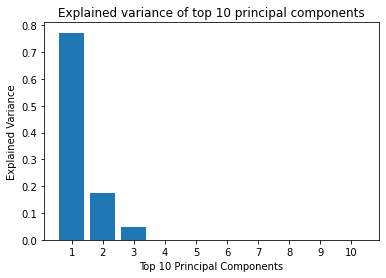

In [135]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' +str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [136]:
xpca = xpca.truncate(after=2,axis=1)
xpca

,0,1,2
0,-22.095256,-82.844429,-22.494887
1,16.160555,-8.042155,-24.203561
2,12.791677,89.854391,-25.630998
3,-113.147170,-96.272790,-20.950655
4,104.057795,28.418219,-26.134989
...,...,...,...
260010,88.336165,-53.579540,63.373661
260011,104.640313,-38.522362,62.920182
260012,73.426988,-78.671839,63.980270
260013,45.906454,-39.690122,63.806392


In [140]:
clf = KNeighborsClassifier(n_neighbors=5)

In [141]:
clf.fit(xtrain,ytrain)

KNeighborsClassifier()

In [143]:
ypred = clf.predict(xtest)

In [147]:
test_acc = accuracy_score(ytest, ypred)
test_acc

0.9905006089353247

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[ 8455   108     0     0]
 [  109 13742   126     0]
 [    0   147 32767   120]
 [    0     0   131 22300]]


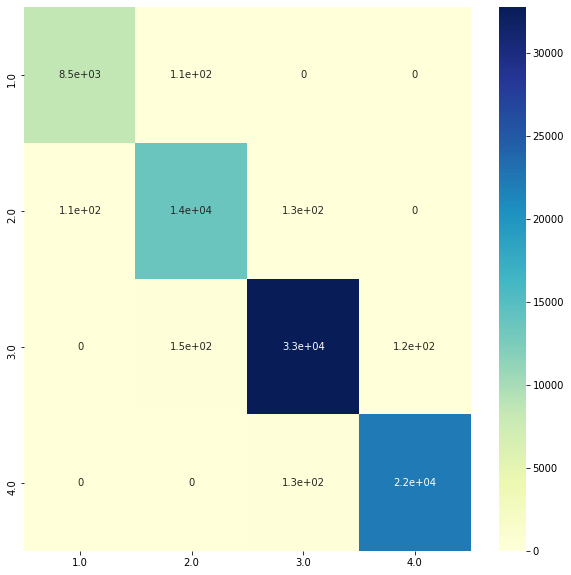

In [152]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()